In [1]:
cd /media/d/romhacking/Violet_Sources

/media/d/romhacking/Violet_Sources


In [2]:
import pymap.gui.render
import pymap.project
import json
import matplotlib.pyplot as plt
import agb.image

In [3]:
proj = pymap.project.Project('proj.pmp')

In [4]:
with open(proj.tilesets['maptileset0']) as f:
    ts0 = json.load(f)['data']
with open(proj.tilesets['maptileset1']) as f:
    ts1 = json.load(f)['data']
with open(proj.footers['map_footer_78'][1]) as f:
    footer = json.load(f)['data']

In [5]:
tiles = pymap.gui.render.get_tiles(ts0, ts1, proj)
len(tiles)

13

In [6]:
blocks = pymap.gui.render.get_blocks(ts0, ts1, tiles, proj)

/media/d/romhacking/pyagb/pymap/gui/render.py:108: UserWarning: Pal index >= 13: 15
  warn(f'Pal index >= 13: {pal_idx}')


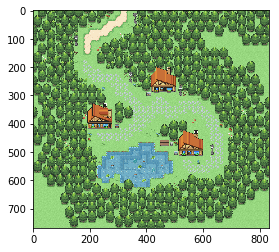

In [7]:
map_img = pymap.gui.render.get_map(footer, blocks, proj)
plt.imshow(map_img)

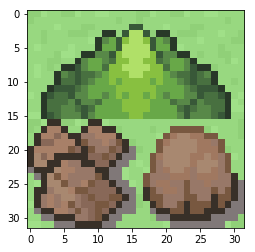

In [8]:
border_img = pymap.gui.render.get_border(footer, blocks, proj)
plt.imshow(border_img)

In [6]:
gfx_path = proj.config['pymap']['tileset']['gfx_path']
gfx_primary = pymap.gui.render.get_attribute_by_path(ts0, gfx_path)
gfx_secondary = pymap.gui.render.get_attribute_by_path(ts1, gfx_path)
gfx_primary, ts0pal = agb.image.from_file(proj.gfxs[gfx_primary])
gfx_secondary, ts1pal = agb.image.from_file(proj.gfxs[gfx_secondary])

In [7]:
palettes = pymap.gui.render.pack_colors(ts0, proj) + pymap.gui.render.pack_colors(ts1, proj)

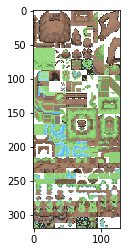

In [8]:
plt.imshow(gfx_primary.to_pil_image(palettes[0]))

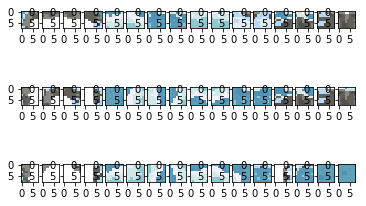

In [11]:
for i, tile in enumerate(tiles[3][0x180:0x180 + 6 * 8]):
    plt.subplot(3, 16, i + 1)
    plt.imshow(tile)